In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [2]:
data = json.loads(open("time_diffs.json").read())
llm_times = pd.Series(data["llm_times"])
tts_times = pd.Series(data["stt_times"])
stt_times = pd.Series(data["tts_times"])
audio_times = pd.Series(data["audio_times"])
send_times = pd.Series(data["send_times"])
receive_times = pd.Series(data["receive_times"])

In [3]:
tts_times.count(), audio_times.count(), send_times.count(), receive_times.count(), llm_times.count(), stt_times.count()

(42, 42, 42, 24, 282, 25)

In [4]:
data = {
    "LLM Times": llm_times,
    "TTS Times": tts_times,
    "STT Times": stt_times,
    # "Audio Times": audio_times,
    "Send Times": send_times,
    "Receive Times": receive_times,
}

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

In [7]:
df.describe()

,LLM Times,TTS Times,STT Times,Send Times,Receive Times
count,282.000000,42.000000,25.000000,42.000000,24.000000
mean,64.888248,816.362950,565.737448,851.593464,50.087837
std,226.101840,351.532329,214.969195,1218.555984,56.925785
min,0.000000,418.408000,265.858300,-31.785600,21.345400
25%,0.000000,610.351775,493.881400,59.107600,30.935050
50%,0.000000,744.212050,538.617000,653.413350,36.475000
75%,86.889075,920.818650,574.013000,854.142200,43.174075
max,3563.660300,1927.976400,1462.884300,6901.353600,308.986300


In [5]:
z_scores = (df - df.mean(skipna=True)) / df.std(skipna=True)

# Filtra os valores cujo Z-Score absoluto seja menor ou igual a 3
filtered_df = df[(np.abs(z_scores) <= 3).all(axis=1)]

# Exibe o DataFrame filtrado
filtered_df.describe()

,LLM Times,TTS Times,STT Times,Send Times,Receive Times
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,44.335310,774.190720,525.787905,908.355720,36.695430
std,66.562929,279.868346,113.658937,759.926340,11.959855
min,0.000000,418.408000,265.858300,-28.356700,21.345400
25%,0.000000,611.057125,492.308400,638.977700,29.999100
50%,0.829350,741.705750,544.064650,789.487100,35.387850
75%,85.579175,911.463350,570.273275,895.862725,39.278150
max,260.038100,1637.962100,797.057200,3842.445900,78.753300


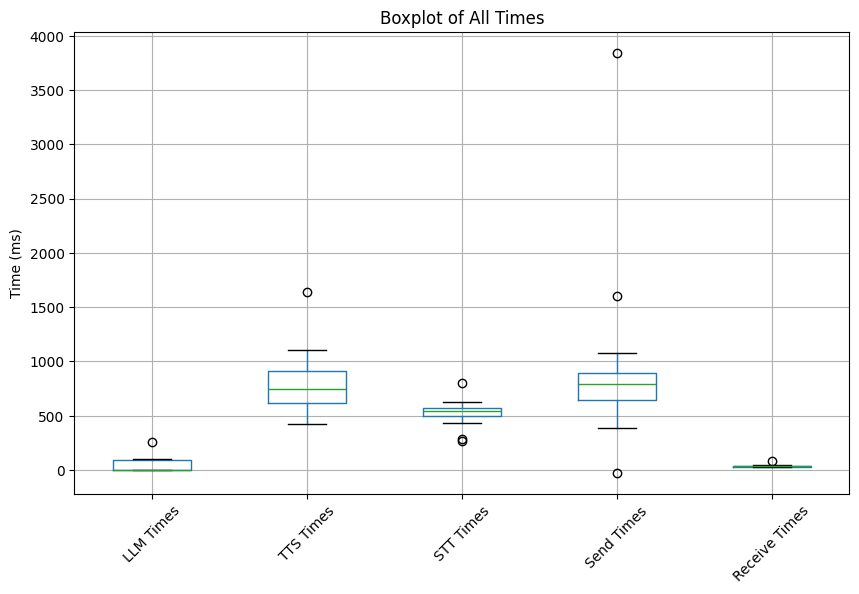

In [6]:
# Gera um único boxplot indexado
plt.figure(figsize=(10, 6))
filtered_df.boxplot()
plt.title("Boxplot of All Times")
plt.ylabel("Time (ms)")
plt.xticks(rotation=45)
plt.show()